<a href="https://colab.research.google.com/github/henry5250/SpotCheck/blob/main/scripts/2_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read in the zip files and load images

In [1]:
# import the modules needed
import zipfile
import os

# zip file paths and directory where images are stored
zip_files = ['/content/Harmonia_axyridis.zip', '/content/Coccinella_novemnotata.zip']
extract_dir = '/content/extracted_images'

os.makedirs(extract_dir, exist_ok=True)

# extract all the images from the zip file into the directory
for zip_file in zip_files:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

print(f"All files extracted to {extract_dir}")

All files extracted to /content/extracted_images


Listing images from: /content/extracted_images/Harmonia_axyridis
Displaying: 0120.jpg


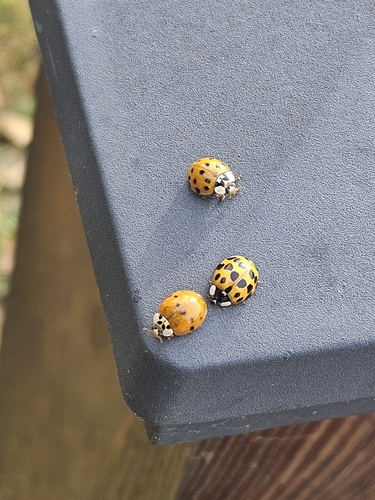

Displaying: 0115.jpg


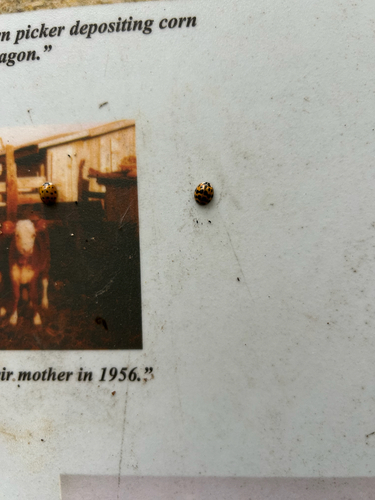

Displaying: 0104.jpg


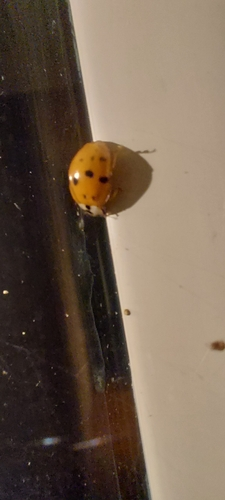

Displaying: 0003.jpg


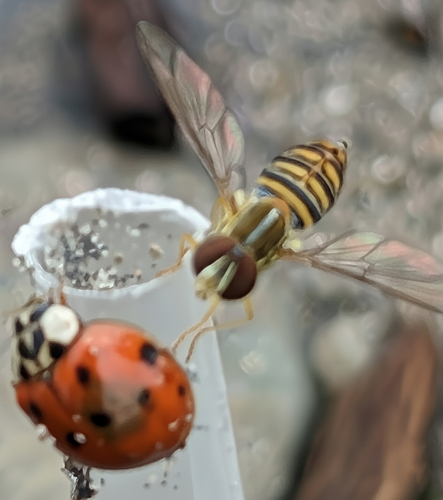

Displaying: 0100.jpg


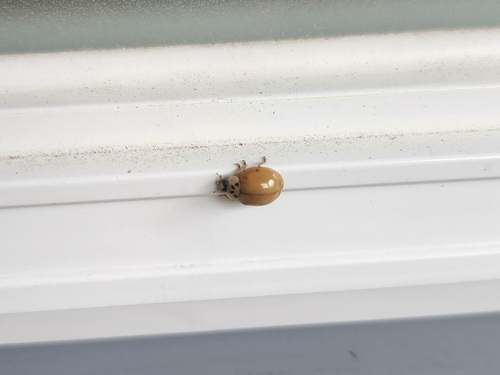

------------------------------
Listing images from: /content/extracted_images/Coccinella_novemnotata
Displaying: 0099.jpg


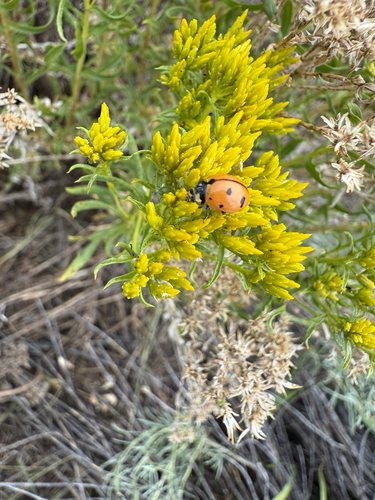

Displaying: 0048.jpg


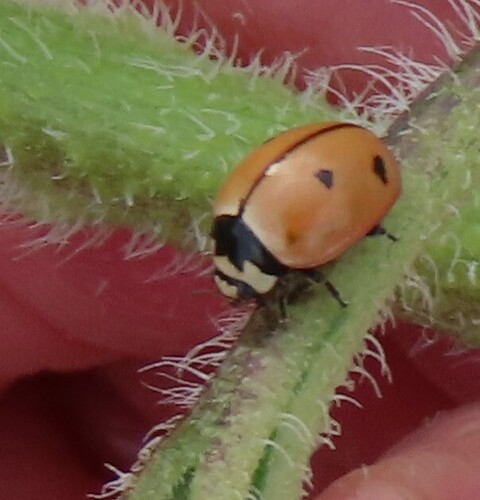

Displaying: 0024.jpg


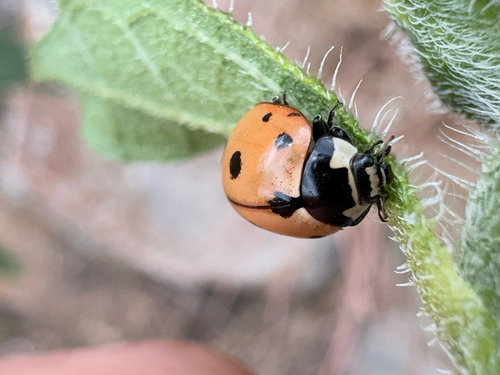

Displaying: 0010.jpg


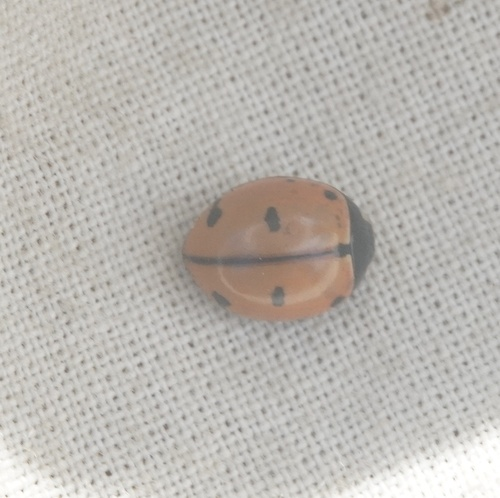

Displaying: 0022.jpg


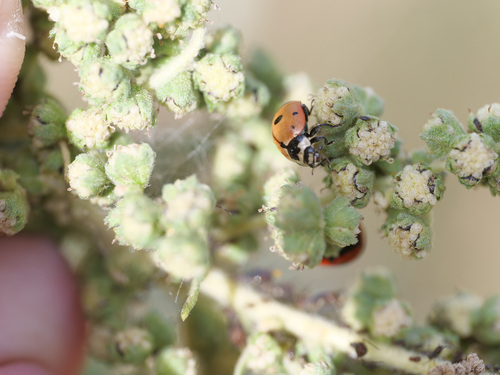

------------------------------


In [2]:
# import modules
import os
import random
from IPython.display import display, Image

# list of paths to the specific directories for each species
extracted_dirs = [os.path.join(extract_dir, os.path.splitext(os.path.basename(zip_file))[0]) for zip_file in zip_files]

for directory in extracted_dirs:
    print(f"Listing images from: {directory}")
    image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if not image_files:
        print("No image files found.")
        continue

    # show a few random images
    sample_images = random.sample(image_files, min(5, len(image_files)))
    for image_name in sample_images:
        image_path = os.path.join(directory, image_name)
        print(f"Displaying: {image_name}")
        display(Image(filename=image_path))
    print("-" * 30)

# Preprocessing Steps:
- resize all the images in the files to 224x224 pixels
- normalize all the resized images by scaling the pixel values from [0,1]

# Resize all the images to 224x224 pixels

In [3]:
# install Pillow library
%pip install Pillow

In [4]:
# import modules
from PIL import Image
import os

# function that takes image path and tuple target size
def resize_and_save_image(image_path, target_size):
    """
    Resizes an image and saves it, overwriting the original file. # Docstring: Explains what the function does.

    Args:
        image_path (str): The path to the image file. # Docstring: Describes the 'image_path' argument.
        target_size (tuple): The target size as (width, height). # Docstring: Describes the 'target_size' argument.
    """
    try:
        img = Image.open(image_path)
        img_resized = img.resize(target_size)
        img_resized.save(image_path)
        print(f"Resized and saved: {image_path}")
    except FileNotFoundError:
        print(f"Error: File not found at {image_path}")
    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")

In [5]:
# make the target size for the images as a tuple
# our target dimensions for image resizing is 224x224 pixels
target_size = (224, 224)

# iterate through the directories
for directory in extracted_dirs:
    print(f"Processing images in: {directory}")
    # list all files in each directory
    all_files = os.listdir(directory)

    # include only image files
    image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print("No image files found in this directory.")
        continue

    # create the full image path for the image files
    for image_name in image_files:
        image_path = os.path.join(directory, image_name)
        # save the images
        resize_and_save_image(image_path, target_size)

Processing images in: /content/extracted_images/Harmonia_axyridis
Resized and saved: /content/extracted_images/Harmonia_axyridis/0110.jpg
Resized and saved: /content/extracted_images/Harmonia_axyridis/0004.jpg
Resized and saved: /content/extracted_images/Harmonia_axyridis/0063.jpg
Resized and saved: /content/extracted_images/Harmonia_axyridis/0074.jpg
Resized and saved: /content/extracted_images/Harmonia_axyridis/0044.jpg
Resized and saved: /content/extracted_images/Harmonia_axyridis/0115.jpg
Resized and saved: /content/extracted_images/Harmonia_axyridis/0103.jpg
Resized and saved: /content/extracted_images/Harmonia_axyridis/0084.jpg
Resized and saved: /content/extracted_images/Harmonia_axyridis/0006.jpg
Resized and saved: /content/extracted_images/Harmonia_axyridis/0016.jpg
Resized and saved: /content/extracted_images/Harmonia_axyridis/0020.jpg
Resized and saved: /content/extracted_images/Harmonia_axyridis/0032.jpg
Resized and saved: /content/extracted_images/Harmonia_axyridis/0070.jp

In [6]:
# import modules
import os
from PIL import Image

# look at some images that are already resized
verification_images = []
for directory in extracted_dirs:
    all_files = os.listdir(directory)
    image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if image_files:
        # look at 3 random images
        verification_images.extend([os.path.join(directory, img) for img in random.sample(image_files, min(3, len(image_files)))])

# verify the dimensions
print("\nVerifying dimensions of a few resized images:")
for image_path in verification_images:
    try:
        img = Image.open(image_path)
        print(f"Image: {os.path.basename(image_path)}, Dimensions: {img.size}")
        img.close()
    except FileNotFoundError:
        print(f"Error: File not found at {image_path}")
    except Exception as e:
        print(f"An error occurred while verifying {image_path}: {e}")


Verifying dimensions of a few resized images:
Image: 0011.jpg, Dimensions: (224, 224)
Image: 0019.jpg, Dimensions: (224, 224)
Image: 0012.jpg, Dimensions: (224, 224)
Image: 0111.jpg, Dimensions: (224, 224)
Image: 0022.jpg, Dimensions: (224, 224)
Image: 0082.jpg, Dimensions: (224, 224)


# Normalize the images

In [7]:
# import modules
import numpy as np
from PIL import Image

# function that resizes, normalizes, and saves the images
def resize_normalize_and_save_image(image_path, target_size):
    """
    Resizes and normalizes an image, then saves it, overwriting the original file. # Docstring: Describes the function's overall purpose.

    Args:
        image_path (str): The path to the image file. # Docstring: Describes the 'image_path' argument.
        target_size (tuple): The target size as (width, height). # Docstring: Describes the 'target_size' argument.
    """
    try:
        img = Image.open(image_path)
        img_resized = img.resize(target_size)


        img_array = np.array(img_resized)
        img_normalized = img_array / 255.0


        if img_resized.mode == 'RGB':
            img_processed = Image.fromarray((img_normalized * 255).astype(np.uint8), 'RGB')
        elif img_resized.mode == 'L':
             img_processed = Image.fromarray((img_normalized * 255).astype(np.uint8), 'L')
        else:

             img_processed = Image.fromarray((img_normalized * 255).astype(np.uint8))

        img_processed.save(image_path)
        print(f"Resized, normalized, and saved: {image_path}")
    except FileNotFoundError:
        print(f"Error: File not found at {image_path}")
    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")

In [8]:
# go through the list of directories
for directory in extracted_dirs:
    print(f"Processing images in: {directory}")

    all_files = os.listdir(directory)

    # filter to only include images
    image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print("No image files found in this directory.")
        continue

    # get the full image path for each
    for image_name in image_files:
        image_path = os.path.join(directory, image_name)
        # call the function created earlier
        resize_normalize_and_save_image(image_path, target_size)

Processing images in: /content/extracted_images/Harmonia_axyridis
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0110.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0004.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0063.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0074.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0044.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0115.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0103.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0084.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0006.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0016.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0020.jpg

/tmp/ipython-input-2334710429.py:24: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img_processed = Image.fromarray((img_normalized * 255).astype(np.uint8), 'RGB')


Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0001.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0023.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0109.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0085.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0035.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0024.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0080.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0036.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0008.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0011.jpg
Resized, normalized, and saved: /content/extracted_images/Harmonia_axyridis/0056.jpg
Resized, normalized, and saved: /content/extracted_images/Harmoni

In [9]:
# import modules
import numpy as np
from PIL import Image
import os
import random

# verify the resizing and normalization occurred in images
verification_images = []
for directory in extracted_dirs:
    all_files = os.listdir(directory)
    image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if image_files:
        # choose 3 random images
        verification_images.extend([os.path.join(directory, img) for img in random.sample(image_files, min(3, len(image_files)))])

# verify the dimensions and pixel value ranges
print("\nVerifying dimensions and pixel values of a few processed images:")
for image_path in verification_images:
    try:
        img = Image.open(image_path)
        print(f"Image: {os.path.basename(image_path)}")

        # check dimensions
        print(f"  Dimensions: {img.size}")
        if img.size != target_size:
            print(f"  Warning: Dimensions mismatch. Expected {target_size}, got {img.size}")

        # check pixel values
        img_array = np.array(img)
        min_pixel_value = np.min(img_array)
        max_pixel_value = np.max(img_array)

        print(f"  Min pixel value: {min_pixel_value}")
        print(f"  Max pixel value: {max_pixel_value}")

        # check if values are in range and proper normalization
        if min_pixel_value < 0 or max_pixel_value > 255:
             print(f"  Warning: Pixel values outside the expected range [0, 255].")


        img.close()
    except FileNotFoundError:
        print(f"Error: File not found at {image_path}")
    except Exception as e:
        print(f"An error occurred while verifying {image_path}: {e}")


Verifying dimensions and pixel values of a few processed images:
Image: 0003.jpg
  Dimensions: (224, 224)
  Min pixel value: 0
  Max pixel value: 255
Image: 0039.jpg
  Dimensions: (224, 224)
  Min pixel value: 0
  Max pixel value: 255
Image: 0053.jpg
  Dimensions: (224, 224)
  Min pixel value: 0
  Max pixel value: 255
Image: 0035.jpg
  Dimensions: (224, 224)
  Min pixel value: 0
  Max pixel value: 255
Image: 0024.jpg
  Dimensions: (224, 224)
  Min pixel value: 0
  Max pixel value: 255
Image: 0026.jpg
  Dimensions: (224, 224)
  Min pixel value: 0
  Max pixel value: 255


## Rename the image files to be identified by species rather than folder
- _c for coccinella_novemtata
- _h for harmonia_axyridis

In [14]:
# import modules
import os

# define the species identifiers
species_identifiers_for_rename = {
    'Harmonia_axyridis': '_h',
    'Coccinella_novemnotata': '_c'
}

print("Renaming image files in place...")

for directory in extracted_dirs:
    species_name = os.path.basename(directory)
    species_id = species_identifiers_for_rename.get(species_name)

    if species_id is None:
        print(f"Warning: No specific identifier for species: {species_name}. Skipping renaming for this directory.")
        continue

    print(f"Processing directory: {directory} with identifier {species_id}")

    all_files = os.listdir(directory)
    image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print(f"No image files found in {directory} to rename.")
        continue

    for image_name in image_files:
        original_path = os.path.join(directory, image_name)
        base_name, ext = os.path.splitext(image_name)

       # make the new file name based on the identifier
        new_image_name = f"{base_name}{species_id}{ext}"
        new_path = os.path.join(directory, new_image_name)

        # rename the file
        try:
            os.rename(original_path, new_path)
            print(f"  Renamed: {image_name} to {new_image_name}")
        except Exception as e:
            print(f"  Error renaming {image_name}: {e}")

print("Finished renaming all applicable image files.")

Renaming image files in place...
Processing directory: /content/extracted_images/Harmonia_axyridis with identifier _h
  Renamed: 0110.jpg to 0110_h.jpg
  Renamed: 0004.jpg to 0004_h.jpg
  Renamed: 0063.jpg to 0063_h.jpg
  Renamed: 0074.jpg to 0074_h.jpg
  Renamed: 0044.jpg to 0044_h.jpg
  Renamed: 0115.jpg to 0115_h.jpg
  Renamed: 0103.jpg to 0103_h.jpg
  Renamed: 0084.jpg to 0084_h.jpg
  Renamed: 0006.jpg to 0006_h.jpg
  Renamed: 0016.jpg to 0016_h.jpg
  Renamed: 0020.jpg to 0020_h.jpg
  Renamed: 0032.jpg to 0032_h.jpg
  Renamed: 0070.jpg to 0070_h.jpg
  Renamed: 0076.jpg to 0076_h.jpg
  Renamed: 0090.jpg to 0090_h.jpg
  Renamed: 0071.jpg to 0071_h.jpg
  Renamed: 0068.jpg to 0068_h.jpg
  Renamed: 0087.jpg to 0087_h.jpg
  Renamed: 0113.jpg to 0113_h.jpg
  Renamed: 0062.jpg to 0062_h.jpg
  Renamed: 0005.jpg to 0005_h.jpg
  Renamed: 0116.jpg to 0116_h.jpg
  Renamed: 0102.jpg to 0102_h.jpg
  Renamed: 0091.jpg to 0091_h.jpg
  Renamed: 0117.jpg to 0117_h.jpg
  Renamed: 0048.jpg to 0048_h.jp

# Verify the file names

In [15]:
import os
import random

print("Verifying renamed image files:")
for directory in extracted_dirs:
    species_name = os.path.basename(directory)
    expected_id = species_identifiers_for_rename.get(species_name)

    print(f"Checking directory: {directory}")
    all_files = os.listdir(directory)
    renamed_image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not renamed_image_files:
        print(f"  No image files found in {directory} (after renaming).")
        continue

    sample_files = random.sample(renamed_image_files, min(5, len(renamed_image_files)))
    for filename in sample_files:
        if expected_id and expected_id in filename:
            print(f"  Sample file: {filename} (contains expected '{expected_id}')")
        else:
            print(f"  Sample file: {filename} (WARNING: Does not contain expected '{expected_id}' or ID is missing)")

print("Verification complete.")

Verifying renamed image files:
Checking directory: /content/extracted_images/Harmonia_axyridis
  Sample file: 0075_h.jpg (contains expected '_h')
  Sample file: 0048_h.jpg (contains expected '_h')
  Sample file: 0068_h.jpg (contains expected '_h')
  Sample file: 0050_h.jpg (contains expected '_h')
  Sample file: 0089_h.jpg (contains expected '_h')
Checking directory: /content/extracted_images/Coccinella_novemnotata
  Sample file: 0071_c.jpg (contains expected '_c')
  Sample file: 0052_c.jpg (contains expected '_c')
  Sample file: 0076_c.jpg (contains expected '_c')
  Sample file: 0102_c.jpg (contains expected '_c')
  Sample file: 0004_c.jpg (contains expected '_c')
Verification complete.


# Download finalized images into final zip files

In [16]:
import os
import zipfile

species_identifiers = {
    'Harmonia_axyridis': '_h',
    'Coccinella_novemnotata': '_c'
}

# define directory where the final zip files will be saved
output_zip_dir = '/content/final_species_zips'
os.makedirs(output_zip_dir, exist_ok=True)

print("Creating new final species zip files...")

for directory in extracted_dirs:
    species_name = os.path.basename(directory)

    species_id = species_identifiers.get(species_name)

    if species_id is None:
        print(f"Warning: No identifier found for species: {species_name}. Skipping zip creation.")
        continue

    # new zip file name 'final_SpeciesName.zip'
    new_zip_filename = os.path.join(output_zip_dir, f"final_{species_name}.zip")

    print(f"\nCreating zip file for {species_name}: {new_zip_filename}")
    with zipfile.ZipFile(new_zip_filename, 'w', zipfile.ZIP_DEFLATED) as new_zip_file:
        all_files_in_dir = os.listdir(directory)

        image_files_in_dir = [f for f in all_files_in_dir if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if not image_files_in_dir:
            print(f"No image files found in {directory}. New zip file will be empty.")

        for image_name in image_files_in_dir:
            original_image_path = os.path.join(directory, image_name)

            new_zip_file.write(original_image_path, arcname=image_name)
            print(f"  Added: {image_name}")

    print(f"Finished creating {new_zip_filename}")

print("\nAll final species zip files created.")

Creating new final species zip files...

Creating zip file for Harmonia_axyridis: /content/final_species_zips/final_Harmonia_axyridis.zip
  Added: 0011_h.jpg
  Added: 0119_h.jpg
  Added: 0118_h.jpg
  Added: 0117_h.jpg
  Added: 0067_h.jpg
  Added: 0055_h.jpg
  Added: 0088_h.jpg
  Added: 0066_h.jpg
  Added: 0003_h.jpg
  Added: 0083_h.jpg
  Added: 0108_h.jpg
  Added: 0027_h.jpg
  Added: 0093_h.jpg
  Added: 0094_h.jpg
  Added: 0033_h.jpg
  Added: 0037_h.jpg
  Added: 0016_h.jpg
  Added: 0049_h.jpg
  Added: 0073_h.jpg
  Added: 0085_h.jpg
  Added: 0097_h.jpg
  Added: 0030_h.jpg
  Added: 0111_h.jpg
  Added: 0064_h.jpg
  Added: 0015_h.jpg
  Added: 0001_h.jpg
  Added: 0091_h.jpg
  Added: 0007_h.jpg
  Added: 0058_h.jpg
  Added: 0052_h.jpg
  Added: 0096_h.jpg
  Added: 0014_h.jpg
  Added: 0061_h.jpg
  Added: 0109_h.jpg
  Added: 0026_h.jpg
  Added: 0115_h.jpg
  Added: 0112_h.jpg
  Added: 0092_h.jpg
  Added: 0042_h.jpg
  Added: 0081_h.jpg
  Added: 0089_h.jpg
  Added: 0044_h.jpg
  Added: 0110_h.jpg
  

In [17]:
import zipfile
import os
import random

# list all zip files in new diretory
processed_zip_files = [os.path.join(output_zip_dir, f) for f in os.listdir(output_zip_dir) if f.startswith('final_') and f.endswith('.zip')]

print("Verifying contents of newly created final species zip files:")
for zip_path in processed_zip_files:
    print(f"\nChecking zip file: {zip_path}")
    try:
        with zipfile.ZipFile(zip_path, 'r') as zf:
            file_list = zf.namelist()

            if not file_list:
                print(f"  Warning: Zip file {zip_path} is empty.")
                continue

            species_name_from_zip = os.path.basename(zip_path).replace('final_', '').replace('.zip', '')
            expected_species_id = species_identifiers.get(species_name_from_zip)

            if expected_species_id is None:
                print(f"  Warning: Could not determine expected species ID for {species_name_from_zip}. \
Ignoring filename verification for this zip.")
                continue

            # check file names inside zip
            sample_files_to_check = random.sample(file_list, min(5, len(file_list)))
            for filename_in_zip in sample_files_to_check:
                if expected_species_id in filename_in_zip:
                    print(f"  Verified: '{filename_in_zip}' contains '{expected_species_id}'.")
                else:
                    print(f"  Error: '{filename_in_zip}' in {zip_path} does NOT contain expected identifier '{expected_species_id}'.")

    except zipfile.BadZipFile:
        print(f"  Error: {zip_path} is not a valid zip file.")
    except Exception as e:
        print(f"  An unexpected error occurred while checking {zip_path}: {e}")

print("\nFinal zip file verification complete.")

Verifying contents of newly created final species zip files:

Checking zip file: /content/final_species_zips/final_Harmonia_axyridis.zip
  Verified: '0028_h.jpg' contains '_h'.
  Verified: '0004_h.jpg' contains '_h'.
  Verified: '0006_h.jpg' contains '_h'.
  Verified: '0049_h.jpg' contains '_h'.
  Verified: '0093_h.jpg' contains '_h'.

Checking zip file: /content/final_species_zips/final_Coccinella_novemnotata.zip
  Verified: '0050_c.jpg' contains '_c'.
  Verified: '0069_c.jpg' contains '_c'.
  Verified: '0059_c.jpg' contains '_c'.
  Verified: '0100_c.jpg' contains '_c'.
  Verified: '0016_c.jpg' contains '_c'.

Final zip file verification complete.
